In [3]:
#from tf_pose_estimation.tf_pose.estimator import TfPoseEstimator
#from tf_pose_estimation.tf_pose.networks import get_graph_path, model_wh


ModuleNotFoundError: No module named 'tf_pose'

In [4]:
import os 
os.chdir('tf_pose_estimation/')

FileNotFoundError: [WinError 2] The system cannot find the file specified: 'tf_pose_estimation/'

In [7]:
import argparse
import logging
import time

import cv2
import numpy as np
from tf_pose.estimator import TfPoseEstimator
from tf_pose.networks import get_graph_path, model_wh
from pandas import DataFrame

In [8]:
model_dire='cmu'

In [23]:
video_reader=cv2.VideoCapture('test2.avi')
for frame_counter in range(71):
    video_reader.set(cv2.CAP_PROP_POS_FRAMES,20)
    sucess,frame=video_reader.read()

    if not sucess:
        break
    break    
img=cv2.resize(frame,(432,368))  


In [24]:
img_clone=np.copy(img)
h,w=img_clone.shape[:2]

In [25]:
w,h

(432, 368)

In [19]:
 e = TfPoseEstimator(get_graph_path(model_dire), target_size=(w, h))

[2022-04-08 23:52:40,765] [TfPoseEstimator] [INFO] loading graph from D:\Python Projects\Fall detection tf-pose\tf_pose_estimation\models\graph/cmu/graph_opt.pb(default size=432x368)


TfPoseEstimator/Openpose/concat_stage7/axis
TfPoseEstimator/Mconv7_stage6_L2/biases
TfPoseEstimator/Mconv7_stage6_L2/weights
TfPoseEstimator/Mconv6_stage6_L2/biases
TfPoseEstimator/Mconv6_stage6_L2/weights
TfPoseEstimator/Mconv5_stage6_L2/biases
TfPoseEstimator/Mconv5_stage6_L2/weights
TfPoseEstimator/Mconv4_stage6_L2/biases
TfPoseEstimator/Mconv4_stage6_L2/weights
TfPoseEstimator/Mconv3_stage6_L2/biases
TfPoseEstimator/Mconv3_stage6_L2/weights
TfPoseEstimator/Mconv2_stage6_L2/biases
TfPoseEstimator/Mconv2_stage6_L2/weights
TfPoseEstimator/Mconv1_stage6_L2/biases
TfPoseEstimator/Mconv1_stage6_L2/weights
TfPoseEstimator/Mconv7_stage6_L1/biases
TfPoseEstimator/Mconv7_stage6_L1/weights
TfPoseEstimator/Mconv6_stage6_L1/biases
TfPoseEstimator/Mconv6_stage6_L1/weights
TfPoseEstimator/Mconv5_stage6_L1/biases
TfPoseEstimator/Mconv5_stage6_L1/weights
TfPoseEstimator/Mconv4_stage6_L1/biases
TfPoseEstimator/Mconv4_stage6_L1/weights
TfPoseEstimator/Mconv3_stage6_L1/biases
TfPoseEstimator/Mconv3_st

In [20]:
img.shape

(368, 432, 3)

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

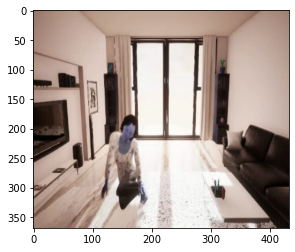

In [27]:
plt.imshow(img_clone)

In [28]:
 humans = e.inference(img_clone, resize_to_default=(w > 0 and h > 0), upsample_size=4.0)

In [29]:
humans

[BodyPart:0-(0.37, 0.56) score=0.73 BodyPart:1-(0.35, 0.59) score=0.90 BodyPart:2-(0.31, 0.57) score=0.79 BodyPart:3-(0.30, 0.67) score=0.56 BodyPart:4-(0.28, 0.77) score=0.30 BodyPart:5-(0.39, 0.60) score=0.77 BodyPart:6-(0.40, 0.70) score=0.62 BodyPart:7-(0.41, 0.78) score=0.61 BodyPart:8-(0.31, 0.76) score=0.44 BodyPart:9-(0.29, 0.89) score=0.12 BodyPart:11-(0.37, 0.77) score=0.42 BodyPart:12-(0.34, 0.89) score=0.12 BodyPart:14-(0.36, 0.54) score=0.76 BodyPart:15-(0.38, 0.55) score=0.68 BodyPart:16-(0.34, 0.53) score=0.62 BodyPart:17-(0.39, 0.54) score=0.36]

In [30]:
skeletons = [[0.0,0.0,.0]]*18
scale_h=4.0
for human in humans:
    index=0
    for i, body_part in human.body_parts.items():# iterate dict
        idx=body_part.part_idx
        x=body_part.x
        y=body_part.y
        p=body_part.score
        skeletons[idx]=[x,y,p]
        
       
            

In [31]:
df=DataFrame(skeletons,columns=['x','y','score'])

In [32]:
df

,x,y,score
0,0.365741,0.559783,0.734978
1,0.351852,0.586957,0.903787
2,0.314815,0.570652,0.790955
3,0.296296,0.668478,0.560110
4,0.282407,0.771739,0.298423
5,0.388889,0.603261,0.766288
6,0.398148,0.701087,0.622828
7,0.412037,0.777174,0.607214
8,0.310185,0.760870,0.441400
9,0.287037,0.885870,0.118716


In [18]:
df=DataFrame(skeletons,columns=['x','y','score'])
df

,x,y,score
0,0.347222,0.510870,0.752622
1,0.337963,0.597826,0.715511
2,0.296296,0.597826,0.766486
3,0.277778,0.722826,0.710958
4,0.254630,0.858696,0.580758
5,0.384259,0.597826,0.688861
6,0.412037,0.684783,0.642067
7,0.462963,0.722826,0.804297
8,0.337963,0.788043,0.566704
9,0.421296,0.913043,0.529586


0.1625

In [50]:
df_1=DataFrame(skeletons_1)

In [51]:
df_1

,0,1,2
0,0.165625,0.761111,0.381028
1,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000
...,...,...,...
301,0.000000,0.000000,0.000000
302,0.000000,0.000000,0.000000
303,0.000000,0.000000,0.000000
304,0.000000,0.000000,0.000000


In [71]:
video_reader=cv2.VideoCapture('test2.avi')


In [67]:
 video_reader.set(cv.CAP_PROP_POS_FRAMES,frame_counter*skip_frames)

In [72]:
total_frames=int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))

In [73]:
total_frames

71

In [76]:
for frame_counter in range(71):
    video_reader.set(cv2.CAP_PROP_POS_FRAMES,65)
    sucess,frame=video_reader.read()
    if not sucess:
        break
    break    

    
        
        
        

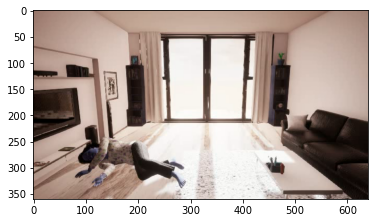

In [77]:
plt.imshow(frame)

In [47]:
list(range(18))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]